In [30]:
import pandas as pd
import numpy as np
import scipy
import nltk
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,roc_curve,confusion_matrix
import math
import re
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
import ast
from imblearn.over_sampling import SMOTE

RANDOM_STATE=4222


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendanlim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendanlim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
dftrain = pd.read_csv('datasets/train.csv')
dftest = pd.read_csv("Datasets/test.csv")

In [32]:
dftrain.head()

,Unnamed: 0,title,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,special_characters_title,special_characters_company_profile,special_characters_description,special_characters_requirements,special_characters_benefits,title_length,company_profile_length,description_length,requirements_length,benefits_length
0,4654,Part Time Creative Project Manager,0,NoSleepForSheep is a Nashville-based creative ...,Are you passionate about making people happy a...,1+ year project management experienceException...,Flexible schedule.Opportunity to work with a s...,0,1,1,...,-0.627038,-0.611077,-0.070314,-0.332177,-0.147674,0.389080,-0.549954,0.179512,-0.242055,-0.178123
1,1419,Staffing Support Professional,0,Not specified,Armor People Link is currently seeking a Staff...,"Administrative skills, reception experience, r...",Not specified,0,0,0,...,-0.627038,-0.860832,1.923301,-0.556405,-0.527648,0.028108,-1.076950,2.328606,-0.792097,-0.599683
2,14503,Senior Platform Engineer,0,"Come be a part of one of the fastest growing, ...",As platform software engineer you will contrib...,ResponsibilitiesOwn product features and deliv...,Competitive base salaryStock OptionsFull benef...,0,1,1,...,-0.627038,1.386962,-0.850424,1.517706,0.422287,-0.332863,1.405621,-0.960472,1.372746,0.368343
3,11810,Mechanical Design Engineer - CAD CAE 3D - Balt...,0,We Provide Full Time Permanent Positions for m...,D - 129Experienced Mechanical Design Engineer ...,"Thorough knowledge of machine design, stress a...",Not specified,0,0,0,...,2.118301,-0.486200,-0.243672,0.284451,-0.527648,1.905160,-0.682162,0.436669,0.612444,-0.599683
4,4112,Equipment Operator,0,Not specified,Job OverviewApex is an environmental consultin...,Not specified,Not specified,0,0,1,...,-0.627038,-0.860832,1.706604,-0.780634,-0.527648,-0.693835,-1.076950,2.053081,-0.946849,-0.599683


In [33]:
dftest.head()

,Unnamed: 0,title,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,special_characters_title,special_characters_company_profile,special_characters_description,special_characters_requirements,special_characters_benefits,title_length,company_profile_length,description_length,requirements_length,benefits_length
0,10587,Corporate Travel Counselor On-Site,0,Christopherson Business Travel is the independ...,Full-time Corporate Travel Counselor needed to...,"Proficient GDS skills, Worldspan preferredPref...",Christopherson Business Travel Benefits Portfo...,0,1,1,...,0.288079,0.229223,-1.212085,-0.655492,0.397140,0.408225,-0.109195,-1.330159,-0.568358,0.617015
1,10611,IT Recruiter,0,PROSULTINGISPEOPLEThe ProSulting difference is...,Our client a world leader in employment servic...,"Qualifications: Brings a can do attitude, will...",My client offers all of the advantages you wou...,0,1,1,...,-0.618762,1.181382,-0.817437,-0.295400,0.397140,-1.113320,1.398700,0.012037,-0.525279,0.223574
2,14868,Application Software Engineer,0,"Working at FBNAt FBN, we put farmers first. Fo...",FBN's primary mission is to provide farmers wi...,"ResponsibilitiesOnce you join our team, you wi...",Health insuranceStock optionsFarm visits!,0,1,0,...,-0.618762,1.861495,-0.768106,1.084953,-0.440153,0.045953,3.345823,-0.693719,0.677734,-0.526132
3,15868,Release Manager,0,"ForeFront (Fair Haven, NJ) is a fast-growing b...",RESPONSIBILITIES:The Release Manager will work...,REQUIREMENTS:Extremely detail oriented persona...,"WHY FOREFRONT?Talented, innovative, diverse, a...",0,1,0,...,-0.618762,0.455928,-0.422789,-0.535461,1.420497,-0.968411,0.347324,0.545134,0.427239,0.799794
4,10230,Communications Manager,0,and Aptitude Staffing Solutions have partnere...,Qualified candidates are encouraged to apply d...,Some of the desired skills and experience for ...,Our core values drive our culture. This is wha...,0,1,0,...,-0.618762,-0.405549,0.909146,0.484800,4.862699,-0.388775,-0.200845,1.410945,0.144834,5.006821


In [34]:
df_train = dftrain.drop(dftrain.columns[0],axis=1)
df_test = dftest.drop(dftest.columns[0],axis=1)

In [35]:
df_train.describe()

,salary_range,telecommuting,has_company_logo,has_questions,required_experience,required_education,fraudulent,employment_type_Full-time,employment_type_Not specified,employment_type_Other,...,special_characters_title,special_characters_company_profile,special_characters_description,special_characters_requirements,special_characters_benefits,title_length,company_profile_length,description_length,requirements_length,benefits_length
count,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,...,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04,1.251600e+04
mean,0.158757,0.042026,0.792426,0.489214,1.703899,1.149648,0.048418,0.651007,0.193193,0.012943,...,-6.471866e-17,2.072132e-17,5.109368e-17,2.526298e-17,-2.242445e-17,-9.764569e-17,6.585407e-17,4.825514e-17,1.561196e-17,3.548172e-17
std,0.365464,0.200657,0.405586,0.499904,1.733518,1.357559,0.214656,0.476671,0.394819,0.113035,...,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.270380e-01,-8.608321e-01,-1.153801e+00,-7.806337e-01,-5.276481e-01,-1.848944e+00,-1.100821e+00,-1.346207e+00,-9.670337e-01,-6.402774e-01
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.270380e-01,-6.735159e-01,-5.903876e-01,-6.124625e-01,-5.276481e-01,-6.938347e-01,-8.547670e-01,-6.929833e-01,-7.382701e-01,-5.996828e-01
50%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-6.270380e-01,-2.364450e-01,-2.436719e-01,-2.761200e-01,-4.326546e-01,-1.884746e-01,-1.019163e-01,-2.177029e-01,-2.067314e-01,-5.091255e-01
75%,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,2.880748e-01,3.879421e-01,3.197410e-01,2.844507e-01,2.323000e-01,4.612740e-01,4.875107e-01,4.346597e-01,3.786341e-01,2.371909e-01
max,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,9.439203e+00,2.199174e+01,2.168609e+01,2.388448e+01,1.951598e+01,8.186064e+00,9.112242e+00,1.558480e+01,1.706660e+01,1.301200e+01


### TFIDF Embedding Ver

In [36]:
df_train['title_tokens'].apply(ast.literal_eval).apply(lambda x: ' '.join(x))

0                       Part Time Creative Project Manager
1                            Staffing Support Professional
2                                 Senior Platform Engineer
3        Mechanical Design Engineer - CAD CAE 3D - Balt...
4                                       Equipment Operator
                               ...                        
12511                                    Software Engineer
12512                            Dry Processor - Full Time
12513                                  Facilities Engineer
12514                            Marketing - Admin Support
12515                                      Account Manager
Name: title_tokens, Length: 12516, dtype: object

In [37]:
def tfidf_function(column_information):
    vectorizer = TfidfVectorizer()
    df_train_tfidf_model = vectorizer.fit_transform(df_train[column_information].apply(ast.literal_eval).apply(lambda x: ' '.join(x))).toarray()
    df_test_tfidf_model = vectorizer.transform(df_test[column_information].apply(ast.literal_eval).apply(lambda x: ' '.join(x))).toarray()
    return df_train_tfidf_model,df_test_tfidf_model

def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64,activation='relu',input_dim=input_dim))
    model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall()])
    return model

In [38]:
output0train, output0test = tfidf_function('title_tokens')
output1train, output1test = tfidf_function('company_profile_tokens')
output2train, output2test = tfidf_function('description_tokens')
output3train, output3test = tfidf_function('requirements_tokens')
output4train, output4test = tfidf_function('benefits_tokens')

In [39]:
output0train_df = pd.DataFrame(output0train)
output1train_df = pd.DataFrame(output1train)
output2train_df = pd.DataFrame(output2train)
output3train_df = pd.DataFrame(output3train)
output4train_df = pd.DataFrame(output4train)

In [40]:
x_train = df_train.drop(['fraudulent','title','company_profile','description','requirements','benefits','title_tokens','company_profile_tokens','description_tokens','requirements_tokens','benefits_tokens'],axis=1)
y_train = df_train['fraudulent']
x_test = df_test.drop(['fraudulent','title','company_profile','description','requirements','benefits','title_tokens','company_profile_tokens','description_tokens','requirements_tokens','benefits_tokens'],axis=1)
y_test = df_test['fraudulent']

In [41]:
smote = SMOTE(random_state=RANDOM_STATE)

In [42]:
title_resampled,Y_resampled = smote.fit_resample(output0train_df,y_train)

In [43]:
company_profile_resampled,Y_resampled = smote.fit_resample(output1train_df,y_train)

In [44]:
description_resampled,Y_resampled = smote.fit_resample(output2train_df,y_train)

In [45]:
requirements_resampled,Y_resampled = smote.fit_resample(output3train_df,y_train)

In [46]:
benefits_resampled,Y_resampled = smote.fit_resample(output4train_df,y_train)

In [47]:
X_train_resampled,Y_resampled = smote.fit_resample(x_train,y_train)

In [48]:
tf.random.set_seed(RANDOM_STATE)

In [49]:
intermediate_output_train_combined = []
intermediate_output_test_combined = []

for a,b in [(title_resampled,output0test),(company_profile_resampled,output1test),(description_resampled,output2test),(requirements_resampled,output3test),(benefits_resampled,output4test)]:
    feature_nn = nn_model(a.shape[1])
    feature_nn.fit(a,Y_resampled,epochs=10,batch_size=32,validation_split=0.1,verbose=0)
    intermediate_output_train = feature_nn.predict(a)
    intermediate_output_test = feature_nn.predict(b)
    intermediate_output_train_combined.append(intermediate_output_train)
    intermediate_output_test_combined.append(intermediate_output_test)


84/84 [==============================] - 0s 2ms/step


In [50]:
x_train_combined = np.concatenate(intermediate_output_train_combined, axis=1)
x_train_combined = np.concatenate([X_train_resampled,x_train_combined],axis=1)
x_test_combined = np.concatenate(intermediate_output_test_combined,axis=1)
x_test_combined = np.concatenate([x_test,x_test_combined],axis=1)


In [51]:
final_nn = nn_model(input_dim=x_train_combined.shape[1])

In [52]:
final_nn.fit(x_train_combined,Y_resampled,epochs=20,batch_size=64,validation_split=0.1) #batch_size=32

Epoch 1/20
335/335 [==============================] - 2s 2ms/step - loss: 0.1758 - accuracy: 0.9260 - recall_11: 0.8959 - val_loss: 0.0011 - val_accuracy: 1.0000 - val_recall_11: 1.0000
Epoch 2/20
335/335 [==============================] - 1s 2ms/step - loss: 0.0090 - accuracy: 0.9978 - recall_11: 0.9985 - val_loss: 1.4392e-04 - val_accuracy: 1.0000 - val_recall_11: 1.0000
Epoch 3/20
335/335 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9994 - recall_11: 0.9996 - val_loss: 1.0938e-04 - val_accuracy: 1.0000 - val_recall_11: 1.0000
Epoch 4/20
335/335 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - recall_11: 0.9995 - val_loss: 1.5654e-05 - val_accuracy: 1.0000 - val_recall_11: 1.0000
Epoch 5/20
335/335 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9996 - recall_11: 0.9997 - val_loss: 8.5671e-06 - val_accuracy: 1.0000 - val_recall_11: 1.0000
Epoch 6/20
335/335 [==============================] - 

In [53]:
def get_confusion_matrix(actual, predicted, title):
    cf = metrics.confusion_matrix(actual, predicted)
    group_names = ['True Negative','False Positive','False Negative','True Positive'] 
    group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()] 

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    s = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues', xticklabels=['non fraud', 'fraud'], yticklabels=['non fraud', 'fraud'])
    s.set(xlabel='Predictions', ylabel='True Labels', title=title)
    return s

In [54]:
y_pred = (final_nn.predict(x_test_combined)>0.5).astype("int32")

84/84 [==============================] - 0s 777us/step


<AxesSubplot: title={'center': 'Neural Network'}, xlabel='Predictions', ylabel='True Labels'>

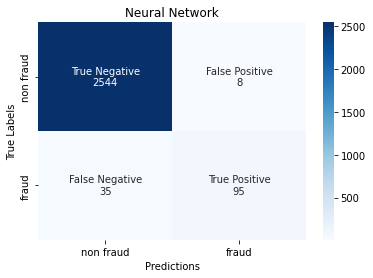

In [55]:
get_confusion_matrix(y_test,y_pred,"Neural Network")

In [56]:
d = {
    'Recall': [metrics.recall_score(y_test,y_pred)],
    'Precision': [metrics.precision_score(y_test,y_pred)],
    'F1-Score': [metrics.f1_score(y_test,y_pred)],
    'Accuracy': [metrics.accuracy_score(y_test,y_pred)],
    'ROC AUC': [metrics.roc_auc_score(y_test,y_pred)],
}

df_metrics = pd.DataFrame(d)
df_metrics

,Recall,Precision,F1-Score,Accuracy,ROC AUC
0,0.730769,0.92233,0.815451,0.983967,0.863817
